In [48]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# Adjacency Matrix representation in Python

class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        self.adjList = {}
        self.size = size

        # Adjacency Matrix
        for i in range(size):
            self.adjMatrix.append([float('inf') if i != j else 0 for j in range(size)])

        # Adjacency List 
        for i in range(size): 
            self.adjList[i] = []
        
    # Add edges
    def add_edge(self, v1, v2, weight):
        if v1 == v2:
            print("Same vertex {} and {}".format(v1, v2))
        elif (v1==0) | (v2==0):
            print("Please enter vertex between 1 - {}".format(self.size))
        
        # Adjacency Matrix
        self.adjMatrix[v1-1][v2-1] = weight
        
        add = 1
        # Adjacency List 
        for item in self.adjList[v1-1]:
            if item[0] == v2: 
                add = 0

        if add: 
            self.adjList[v1-1].append((v2, weight))

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between {} and {}".format(v1, v2))
        elif (v1==0) | (v2==0):
            print("Please enter vertex between 1 - {}".format(self.size))
            return
        
        # Adjacency Matrix
        self.adjMatrix[v1-1][v2-1] = float('inf')

        # Adjacency Matrix 
        self.adjList[v1].remove(v2)

    def getSize(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val), end=" "),
            print("\n")

    def print_list(self): 
        for vertex in self.adjList:
            print("{} -> ".format(vertex+1), end=" ")
            for item in self.adjList[vertex]:
                print("{}".format(item), end=" ")
            print("\n")

    # Check if graph is strongly connected
    def is_strongly_connected(self):
        # Perform DFS from each vertex
        for start in range(self.size):
            visited = [False] * self.size
            self._dfs(start, visited)

            # Check if all vertices were visited
            if not all(visited):
                return False

        return True
    
    # Helper function for DFS
    def _dfs(self, vertex, visited):
        visited[vertex] = True
        for neighbor in self.adjList[vertex]:
            if not visited[neighbor[0] - 1]:
                self._dfs(neighbor[0] - 1, visited)

    def plot_graph(self):
        fig, ax = plt.subplots()
        
        # Create a directed graph
        G = nx.DiGraph()
        
        # Add nodes
        num_vertices = len(self.adjMatrix)
        nodes = range(num_vertices)
        G.add_nodes_from(nodes)
        
        # Add edges
        for i in range(num_vertices):
            for j in range(num_vertices):
                weight = self.adjMatrix[i][j]
                if weight != 0 and weight != float('inf'):
                    G.add_edge(i, j, weight=weight)
        
        # Get node positions using a circular layout
        pos = nx.circular_layout(G)
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, ax=ax)
        
        # Draw node labels
        labels = {i: i+1 for i in range(num_vertices)} # node labels are 1-based indices
        nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color='white', ax=ax)
        
        # Draw edges with arrows and weights
        for edge in G.edges():
            start = edge[0]
            end = edge[1]
            weight = G[start][end]['weight']
            # calculate shift in arrow direction for weight placement
            shift = np.array(pos[end]) - np.array(pos[start])
            shift *= 0.2
            # add arrow
            ax.annotate("",
                        xy=pos[end], xycoords='data',
                        xytext=pos[start], textcoords='data',
                        arrowprops=dict(arrowstyle="->", color="black",
                                        shrinkA=5, shrinkB=5,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=0.2",
                                        ),
                        )
            # add weight
            ax.annotate(weight,
                        xy=pos[start], xycoords='data',
                        xytext=pos[end]-shift, textcoords='data',
                        fontsize=12,
                        ha='center', va='center')
        
        # Set axis limits and remove ticks
        ax.set_xlim([-1.2, 1.2])
        ax.set_ylim([-1.2, 1.2])
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Show the plot
    plt.show()

class priority_queue(object): 
    def __init__(self):
        self.pq = []
        self.len = len(self.pq)

    def add(self, vertex, weight):
        if not self.pq:
            self.pq.append((vertex, weight))
            self.len += 1
            return

        # Binary Search
        low, high = 0, self.len-1

        while low <= high:
            mid = (low + high) // 2
            if self.pq[mid][1] < weight:
                low = mid + 1
            else:
                high = mid - 1

        self.pq.insert(low, (vertex, weight))
        self.len += 1

    def remove(self, vertex): 
        for v in self.pq: 
            if v[0] == vertex: 
                self.pq.remove(v)
                self.len -= 1

    def getMin(self):
        return self.pq[0]

    def printQueue(self):
        print(self.pq)



class priority_queue_heap(object):
    def __init__(self):
        self.pq = []
        self.len = len(self.pq)

    def add(self, vertex, weight):
        heapq.heappush(self.pq, (weight, vertex))
        self.len += 1

    def remove(self, vertex):
        for v in self.pq:
            if v[1] == vertex:
                self.pq.remove(v)
                self.len -= 1

    def pop(self):
        return heapq.heappop(self.pq)

    def printQueue(self):
        print(self.pq)

def DijkstraAlgo_A(graph, source):
    d = []
    pi = []
    S = []
    pq = priority_queue()
    
    # Initialization 
    for v in range(graph.getSize()):
        d.append(float('inf'))
        pi.append(0)
        S.append(None)

    # Set source node 
    d[source-1] = 0

    # Push every vertex into priority queue using array based on d[]
    for vertex in range(len(d)):
        pq.add(vertex, d[vertex])

    while pq.len:
        
        # Get minimum weight    
        u = pq.getMin()[0] 
        S[u] = 1
        pq.remove(u)

        for v in range(graph.getSize()):
            # For every adjacent node
            if ((graph.adjMatrix[u][v] != 0) and 
                (graph.adjMatrix[u][v] != float('inf'))
                # Not already minimized 
                and (S[v] != 1) 
                # Can minimize d[v]
                and (d[v] > d[u] + graph.adjMatrix[u][v])): 
                pq.remove(v)
                d[v] = d[u] + graph.adjMatrix[u][v]
                pi[v] = u+1
                pq.add(v, d[v])

    return S, d, pi
            

def DijkstraAlgo_B(graph, source):
    # use the adjacency list to find the shortest path
    d = []
    pi = []
    S = []
    pq = priority_queue_heap()

    for v in range(graph.getSize()): # Time Complexity = O(V)
        d.append(float('inf'))
        pi.append(0)
        S.append(None)

    d[source-1] = 0

    # Push every vertex into priority queue using array based on d[]
    for vertex in range(len(d)):
        pq.add(vertex, d[vertex])

    while pq.len:
            
            # Get minimum weight and remove node    
            # Time Complexity = O(|V|log|V|) -> Fix Heap for all V vertices.
            u = pq.pop()[1] 
            S[u] = 1

            # For every adjacent node
            # Use BFS to traverse the graph using the adjacency list
            for v in graph.adjList[u]: # Time Complexity = O(|E| + |V|)
                if ((v[1] != 0) and (v[1] != float('inf'))
                and (d[v[0]-1] > d[u] + v[1]) and (S[v[0]-1] == None)):
                    pq.remove(v[0]-1) # Time Complexity = O(V)
                    d[v[0]-1] = d[u] + v[1] 
                    pi[v[0]-1] = u+1
                    pq.add(v[0]-1, d[v[0]-1]) # Time Complexity = O(log(V))


    return S, d, pi

import random

In [49]:
def generate_random_graph(size):
    # Initialize graph
    graph = Graph(size)

    # Generate a random permutation of vertices
    vertices = list(range(1, size + 1))
    random.shuffle(vertices)

    # Add edges to create a random strongly connected graph
    for i in range(size):
        v1 = vertices[i]
        v2 = vertices[(i + 1) % size]
        weight = random.randint(1, 10)
        graph.add_edge(v1, v2, weight)

    # Add additional random edges to increase connectivity
    for i in range(size * 2):
        v1 = random.randint(1, size)
        v2 = random.randint(1, size)
        if v1 != v2:
            weight = random.randint(1, 10)
            graph.add_edge(v1, v2, weight)

    return graph

In [100]:
#below plots the graph to check if the algorithm is working, can use for slides later

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(adj_matrix):
    fig, ax = plt.subplots()
    
    # Create a directed graph
    G = nx.DiGraph()
    
    
    # Add nodes
    num_vertices = len(adj_matrix)
    nodes = range(num_vertices)
    G.add_nodes_from(nodes)
    
    # Add edges
    for i in range(num_vertices):
        for j in range(num_vertices):
            weight = adj_matrix[i][j]
            if weight != 0 and weight != float('inf'):
                G.add_edge(i, j, weight=weight)
    
    # Get node positions using a circular layout
    pos = nx.circular_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, ax=ax)
    
    # Draw node labels
    labels = {i: i+1 for i in range(num_vertices)} # node labels are 1-based indices
    nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color='white', ax=ax)
    
    # Draw edges with arrows
    for edge in G.edges():
        start = edge[0]
        end = edge[1]
        weight = G[start][end]['weight']
        ax.annotate("",
                    xy=pos[end], xycoords='data',
                    xytext=pos[start], textcoords='data',
                    arrowprops=dict(arrowstyle="->", color="black",
                                    shrinkA=5, shrinkB=5,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=0.2",
                                    ),
                    )
        ax.annotate(weight,
                    xy=((pos[start][0] + pos[end][0])/2, (pos[start][1] + pos[end][1])/2),
                    xycoords='data',
                    fontsize=12,
                    ha='center', va='center')
    
    # Set axis limits and remove ticks
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Show the plot
    plt.show()


   0    3    3  inf 

 inf    0    1  inf 

 inf    4    0    8 

   8    1    3    0 

[[0, 3, 3, inf], [inf, 0, 1, inf], [inf, 4, 0, 8], [8, 1, 3, 0]]


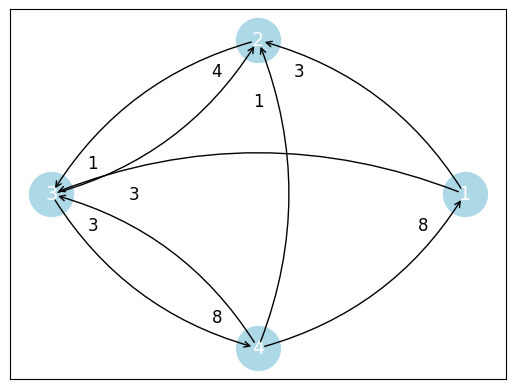

In [125]:
g = generate_random_graph(4)
g.print_matrix()
plot_graph(g.adjMatrix)